important 変数を個々に定義する

In [1]:
SensorNum=3 # Sensor number
SampleNum=16 # Window Width
Overlap=0.5 # overlap
width=3000 # graph width 
EncodingDim=[4,8,12,16,32,64] # number of hidden layer note 
Axis='AccY' # Axis

In [2]:
import numpy as np
import pandas as pd
from scipy import fftpack
from scipy import signal
import time
import os
import matplotlib.pyplot as plt
import pylab
import pickle
import copy

import processing
import window

import matplotlib.animation as animation
import datetime

%matplotlib inline

In [3]:
from keras.models import Sequential
from keras.datasets import cifar10
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adadelta
from keras.utils import np_utils
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils.visualize_util import model_to_dot, plot
from keras import backend as K
from keras.layers import Input, Dense
from keras.models import Model
from keras.callbacks import EarlyStopping
from keras.regularizers import l1,l2,l1l2,activity_l1,activity_l2,activity_l1l2
import matplotlib.image as mpimg


Using Theano backend.
Using gpu device 0: GeForce GTX 970 (CNMeM is disabled, cuDNN 4007)


In [4]:
DataName='sensor'+str(SensorNum)+'_'+Axis
SensorName='sensor'+str(SensorNum)
DicName='MemSensor'+str(SensorNum)

In [5]:
WORKSPACE_PATH = '/home/takeyama/pywork/ipython/2016-07-18'

StudyDataPath=WORKSPACE_PATH+'/Study/'+DataName+'/'+'Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)+'/'
if not os.path.exists(StudyDataPath): os.makedirs(StudyDataPath)

GlaphDataPath=WORKSPACE_PATH+'/Graph/'+DataName+'/Learning-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)+'/'
if not os.path.exists(GlaphDataPath): os.makedirs(GlaphDataPath)

StudyDataModelPicPath=WORKSPACE_PATH+'/Study/'+DataName+'/modelPic-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)+'/'
if not os.path.exists(StudyDataModelPicPath): os.makedirs(StudyDataModelPicPath)

WindowDataPath=WORKSPACE_PATH+'/window/'
RawDataPath=WORKSPACE_PATH+'/raw/'

**Phase1 計測データの取得**

In [6]:
dic=processing.LoadDicDataFromFileNPZ(RawDataPath+DicName)

**Phase2 window flame 作成**

In [7]:
w=window.Window()
w.SetData(Axis,dic[Axis])
wind=w.Compile(windowWidth=SampleNum,overlap=Overlap)
windoW=wind.reshape((len(wind),np.prod(wind.shape[1:])))

AccY is registed now
Build Complete
(254742,)


In [8]:
windoW.shape

(15921, 16)

**前回やった学習をもう１度やってみる  
今回は、正則化をする  
使用するものはl1( L1 weight regularization penalty, also known as LASSO )  
実際、どのくらいの重みにすればいいのかわからないので色々試してみる  **

In [9]:
ParameterL1=[0.01,0.1,0.3,0.5,0.7,0.9]

L1 parameter is 0.01
Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 25s - loss: 0.0118 - val_loss: 0.0020
Epoch 2/50
15921/15921 [==============================] - 25s - loss: 0.0041 - val_loss: 0.0010
Epoch 3/50
15921/15921 [==============================] - 25s - loss: 0.0030 - val_loss: 6.1493e-04
Epoch 4/50
15921/15921 [==============================] - 25s - loss: 0.0025 - val_loss: 4.4438e-04
Epoch 5/50
15921/15921 [==============================] - 25s - loss: 0.0021 - val_loss: 3.9192e-04
Epoch 6/50
15921/15921 [==============================] - 30s - loss: 0.0019 - val_loss: 3.3892e-04
Epoch 7/50
15921/15921 [==============================] - 30s - loss: 0.0017 - val_loss: 3.3140e-04
Epoch 8/50
15921/15921 [==============================] - 32s - loss: 0.0016 - val_loss: 2.8286e-04
Epoch 9/50
15921/15921 [==============================] - 40s - loss: 0.0015 - val_loss: 2.8939e-04
Epoch 10/50
15921/15921 [============

/home/takeyama/.pyenv/versions/takeyama/lib/python2.7/site-packages/keras/backend/theano_backend.py:514: UserWarning: theano.function was asked to create a function computing outputs given certain inputs, but the provided input variable at index 1 is not part of the computational graph needed to compute the outputs: keras_learning_phase.
To make this warning into an error, you can pass the parameter on_unused_input='raise' to theano.function. To disable it completely, use on_unused_input='ignore'.
  **kwargs)


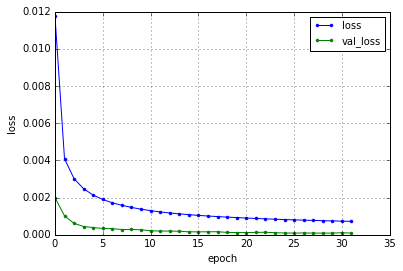

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 25s - loss: 0.0102 - val_loss: 0.0012
Epoch 2/50
15921/15921 [==============================] - 24s - loss: 0.0039 - val_loss: 4.7694e-04
Epoch 3/50
15921/15921 [==============================] - 25s - loss: 0.0028 - val_loss: 3.1092e-04
Epoch 4/50
15921/15921 [==============================] - 24s - loss: 0.0023 - val_loss: 2.9556e-04
Epoch 5/50
15921/15921 [==============================] - 25s - loss: 0.0020 - val_loss: 2.4470e-04
Epoch 6/50
15921/15921 [==============================] - 25s - loss: 0.0018 - val_loss: 2.2389e-04
Epoch 7/50
15921/15921 [==============================] - 25s - loss: 0.0016 - val_loss: 2.2184e-04
Epoch 8/50
15921/15921 [==============================] - 24s - loss: 0.0015 - val_loss: 2.3015e-04
Epoch 9/50
15921/15921 [==============================] - 24s - loss: 0.0014 - val_loss: 1.6869e-04
Epoch 10/50
15921/15921 [=============================

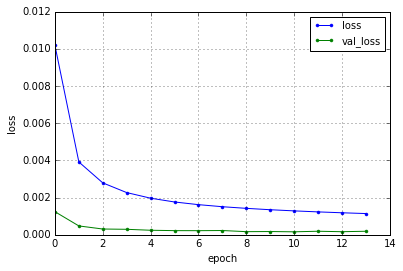

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 23s - loss: 0.0098 - val_loss: 0.0010
Epoch 2/50
15921/15921 [==============================] - 30s - loss: 0.0040 - val_loss: 4.6558e-04
Epoch 3/50
15921/15921 [==============================] - 30s - loss: 0.0029 - val_loss: 3.0911e-04
Epoch 4/50
15921/15921 [==============================] - 30s - loss: 0.0024 - val_loss: 1.7392e-04
Epoch 5/50
15921/15921 [==============================] - 30s - loss: 0.0020 - val_loss: 2.1588e-04
Epoch 6/50
15921/15921 [==============================] - 30s - loss: 0.0018 - val_loss: 1.6942e-04
Epoch 7/50
15921/15921 [==============================] - 30s - loss: 0.0017 - val_loss: 1.6109e-04
Epoch 8/50
15921/15921 [==============================] - 30s - loss: 0.0016 - val_loss: 1.1042e-04
Epoch 9/50
15921/15921 [==============================] - 30s - loss: 0.0015 - val_loss: 1.1100e-04
Epoch 10/50
15921/15921 [=============================

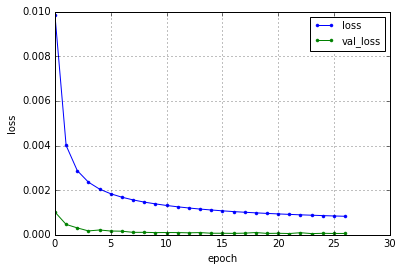

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 25s - loss: 0.0090 - val_loss: 9.0765e-04
Epoch 2/50
15921/15921 [==============================] - 25s - loss: 0.0039 - val_loss: 4.5610e-04
Epoch 3/50
15921/15921 [==============================] - 25s - loss: 0.0029 - val_loss: 2.5952e-04
Epoch 4/50
15921/15921 [==============================] - 25s - loss: 0.0024 - val_loss: 1.8158e-04
Epoch 5/50
15921/15921 [==============================] - 24s - loss: 0.0021 - val_loss: 2.0748e-04
Epoch 6/50
15921/15921 [==============================] - 24s - loss: 0.0019 - val_loss: 1.6918e-04
Epoch 7/50
15921/15921 [==============================] - 25s - loss: 0.0018 - val_loss: 2.5238e-04
Epoch 8/50
15921/15921 [==============================] - 25s - loss: 0.0017 - val_loss: 1.3813e-04
Epoch 9/50
15921/15921 [==============================] - 25s - loss: 0.0016 - val_loss: 1.8417e-04
Epoch 10/50
15921/15921 [=========================

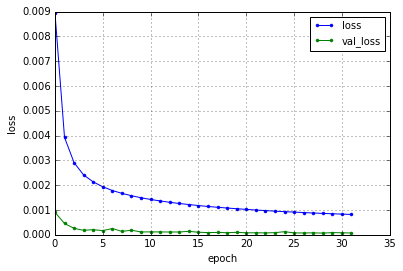

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 24s - loss: 0.0111 - val_loss: 6.1402e-04
Epoch 2/50
15921/15921 [==============================] - 25s - loss: 0.0040 - val_loss: 2.4451e-04
Epoch 3/50
15921/15921 [==============================] - 25s - loss: 0.0030 - val_loss: 2.0865e-04
Epoch 4/50
15921/15921 [==============================] - 25s - loss: 0.0025 - val_loss: 1.8404e-04
Epoch 5/50
15921/15921 [==============================] - 24s - loss: 0.0022 - val_loss: 1.8554e-04
Epoch 6/50
15921/15921 [==============================] - 25s - loss: 0.0020 - val_loss: 2.7119e-04
Epoch 7/50
15921/15921 [==============================] - 25s - loss: 0.0019 - val_loss: 1.6542e-04
Epoch 8/50
15921/15921 [==============================] - 24s - loss: 0.0017 - val_loss: 1.6334e-04
Epoch 9/50
15921/15921 [==============================] - 25s - loss: 0.0016 - val_loss: 1.1557e-04
Epoch 10/50
15921/15921 [=========================

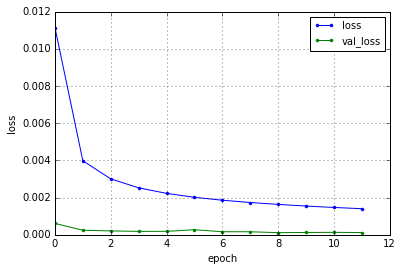

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 145s - loss: 0.0106 - val_loss: 5.2105e-04
Epoch 2/50
15921/15921 [==============================] - 132s - loss: 0.0045 - val_loss: 2.6353e-04
Epoch 3/50
15921/15921 [==============================] - 136s - loss: 0.0034 - val_loss: 2.1861e-04
Epoch 4/50
15921/15921 [==============================] - 132s - loss: 0.0029 - val_loss: 1.5937e-04
Epoch 5/50
15921/15921 [==============================] - 133s - loss: 0.0025 - val_loss: 1.3009e-04
Epoch 6/50
15921/15921 [==============================] - 134s - loss: 0.0023 - val_loss: 1.2996e-04
Epoch 7/50
15921/15921 [==============================] - 129s - loss: 0.0021 - val_loss: 1.3943e-04
Epoch 8/50
15921/15921 [==============================] - 136s - loss: 0.0020 - val_loss: 1.2169e-04
Epoch 9/50
15921/15921 [==============================] - 130s - loss: 0.0018 - val_loss: 9.4490e-05
Epoch 10/50
15921/15921 [================

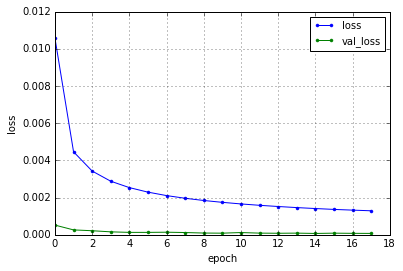

L1 parameter is 0.1
Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 136s - loss: 0.0295 - val_loss: 0.0157
Epoch 2/50
15921/15921 [==============================] - 131s - loss: 0.0190 - val_loss: 0.0055
Epoch 3/50
15921/15921 [==============================] - 136s - loss: 0.0136 - val_loss: 0.0032
Epoch 4/50
15921/15921 [==============================] - 131s - loss: 0.0109 - val_loss: 0.0027
Epoch 5/50
15921/15921 [==============================] - 135s - loss: 0.0094 - val_loss: 0.0022
Epoch 6/50
15921/15921 [==============================] - 131s - loss: 0.0084 - val_loss: 0.0022
Epoch 7/50
15921/15921 [==============================] - 134s - loss: 0.0076 - val_loss: 0.0020
Epoch 8/50
15921/15921 [==============================] - 132s - loss: 0.0070 - val_loss: 0.0019
Epoch 9/50
15921/15921 [==============================] - 129s - loss: 0.0065 - val_loss: 0.0018
Epoch 10/50
15921/15921 [==============================] 

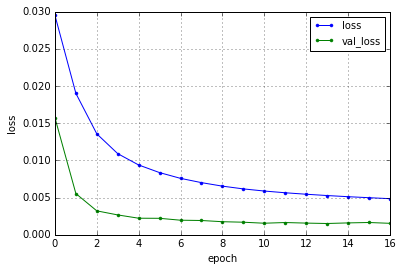

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 132s - loss: 0.0382 - val_loss: 0.0162
Epoch 2/50
15921/15921 [==============================] - 133s - loss: 0.0219 - val_loss: 0.0058
Epoch 3/50
15921/15921 [==============================] - 126s - loss: 0.0157 - val_loss: 0.0034
Epoch 4/50
15921/15921 [==============================] - 135s - loss: 0.0124 - val_loss: 0.0024
Epoch 5/50
15921/15921 [==============================] - 128s - loss: 0.0104 - val_loss: 0.0020
Epoch 6/50
15921/15921 [==============================] - 135s - loss: 0.0091 - val_loss: 0.0021
Epoch 7/50
15921/15921 [==============================] - 130s - loss: 0.0083 - val_loss: 0.0018
Epoch 8/50
15921/15921 [==============================] - 136s - loss: 0.0077 - val_loss: 0.0017
Epoch 9/50
15921/15921 [==============================] - 132s - loss: 0.0073 - val_loss: 0.0018
Epoch 10/50
15921/15921 [==============================] - 135s - loss: 0.006

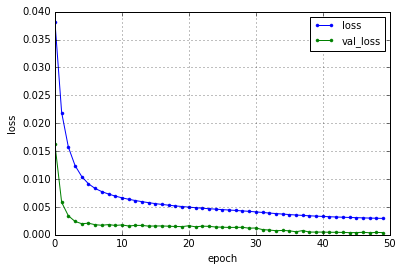

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 20s - loss: 0.0386 - val_loss: 0.0127
Epoch 2/50
15921/15921 [==============================] - 20s - loss: 0.0214 - val_loss: 0.0050
Epoch 3/50
15921/15921 [==============================] - 20s - loss: 0.0154 - val_loss: 0.0029
Epoch 4/50
15921/15921 [==============================] - 20s - loss: 0.0124 - val_loss: 0.0025
Epoch 5/50
15921/15921 [==============================] - 20s - loss: 0.0108 - val_loss: 0.0022
Epoch 6/50
15921/15921 [==============================] - 19s - loss: 0.0097 - val_loss: 0.0019
Epoch 7/50
15921/15921 [==============================] - 20s - loss: 0.0089 - val_loss: 0.0019
Epoch 8/50
15921/15921 [==============================] - 20s - loss: 0.0083 - val_loss: 0.0018
Epoch 9/50
15921/15921 [==============================] - 19s - loss: 0.0078 - val_loss: 0.0018
Epoch 10/50
15921/15921 [==============================] - 20s - loss: 0.0073 - val_lo

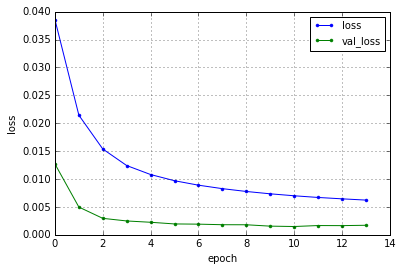

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 141s - loss: 0.0429 - val_loss: 0.0167
Epoch 2/50
15921/15921 [==============================] - 136s - loss: 0.0234 - val_loss: 0.0053
Epoch 3/50
15921/15921 [==============================] - 141s - loss: 0.0166 - val_loss: 0.0030
Epoch 4/50
15921/15921 [==============================] - 138s - loss: 0.0135 - val_loss: 0.0023
Epoch 5/50
15921/15921 [==============================] - 140s - loss: 0.0117 - val_loss: 0.0021
Epoch 6/50
15921/15921 [==============================] - 135s - loss: 0.0105 - val_loss: 0.0019
Epoch 7/50
15921/15921 [==============================] - 141s - loss: 0.0096 - val_loss: 0.0017
Epoch 8/50
15921/15921 [==============================] - 136s - loss: 0.0089 - val_loss: 0.0017
Epoch 9/50
15921/15921 [==============================] - 136s - loss: 0.0084 - val_loss: 0.0015
Epoch 10/50
15921/15921 [==============================] - 140s - loss: 0.007

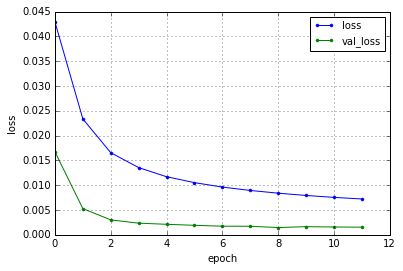

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 134s - loss: 0.0456 - val_loss: 0.0136
Epoch 2/50
15921/15921 [==============================] - 141s - loss: 0.0250 - val_loss: 0.0042
Epoch 3/50
15921/15921 [==============================] - 135s - loss: 0.0187 - val_loss: 0.0033
Epoch 4/50
15921/15921 [==============================] - 141s - loss: 0.0156 - val_loss: 0.0023
Epoch 5/50
15921/15921 [==============================] - 136s - loss: 0.0137 - val_loss: 0.0024
Epoch 6/50
15921/15921 [==============================] - 141s - loss: 0.0124 - val_loss: 0.0019
Epoch 7/50
15921/15921 [==============================] - 137s - loss: 0.0115 - val_loss: 0.0021
Epoch 8/50
15921/15921 [==============================] - 142s - loss: 0.0108 - val_loss: 0.0019
Epoch 9/50
15921/15921 [==============================] - 136s - loss: 0.0102 - val_loss: 0.0018
Epoch 10/50
15921/15921 [==============================] - 140s - loss: 0.009

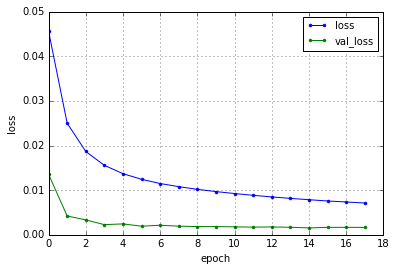

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 141s - loss: 0.0505 - val_loss: 0.0179
Epoch 2/50
15921/15921 [==============================] - 135s - loss: 0.0292 - val_loss: 0.0048
Epoch 3/50
15921/15921 [==============================] - 142s - loss: 0.0216 - val_loss: 0.0028
Epoch 4/50
15921/15921 [==============================] - 137s - loss: 0.0181 - val_loss: 0.0024
Epoch 5/50
15921/15921 [==============================] - 142s - loss: 0.0160 - val_loss: 0.0019
Epoch 6/50
15921/15921 [==============================] - 138s - loss: 0.0145 - val_loss: 0.0020
Epoch 7/50
15921/15921 [==============================] - 141s - loss: 0.0134 - val_loss: 0.0018
Epoch 8/50
15921/15921 [==============================] - 137s - loss: 0.0125 - val_loss: 0.0018
Epoch 9/50
15921/15921 [==============================] - 141s - loss: 0.0117 - val_loss: 0.0018
Epoch 10/50
15921/15921 [==============================] - 136s - loss: 0.011

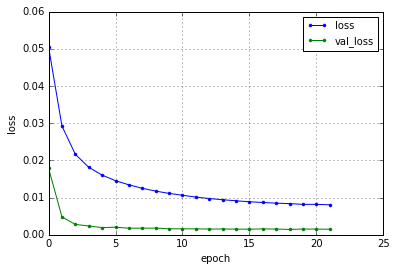

L1 parameter is 0.3
Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 136s - loss: 0.0451 - val_loss: 0.0248
Epoch 2/50
15921/15921 [==============================] - 141s - loss: 0.0295 - val_loss: 0.0241
Epoch 3/50
15921/15921 [==============================] - 136s - loss: 0.0283 - val_loss: 0.0232
Epoch 4/50
12780/15921 [=======================>......] - ETA: 16s - loss: 0.0271

ValueError: I/O operation on closed file

In [10]:
for pl1 in ParameterL1:
    print 'L1 parameter is '+str(pl1)
    for encoding_dim in EncodingDim:
        # define SaveFileName
        commonLabel='_edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)+'-L1='+str(pl1)
        SaveFileNameEncord=DataName+'_encoded'+commonLabel
        SaveFileNameDecord=DataName+'_decoded'+commonLabel
        SaveFileNameNet=DataName+'_net'+'_edim='+commonLabel
        SaveFileNameTrain=DataName+'_train'+commonLabel
        SaveFileNameTest=DataName+'_test'+commonLabel
        SaveFileNameGlaph=GlaphDataPath+DataName+commonLabel+'_loss_val_loss.png'

        window_test=windoW
        window_train=windoW
        processing.SaveDicDataFromFileNPZ(WindowDataPath,SaveFileNameTrain,window_test)
        processing.SaveDicDataFromFileNPZ(WindowDataPath,SaveFileNameTest,window_test)
        shapeNum=windoW.shape[1]

        # this is our input placeholder
        input_img = Input(shape=(shapeNum,))
        # "encoded" is the encoded representation of the input
        encoded = Dense(encoding_dim, activation='tanh',
                       activity_regularizer=activity_l1(pl1))(input_img)
        # "decoded" is the lossy reconstruction of the input
        decoded = Dense(shapeNum, activation='linear')(encoded)

        # this model maps an input to its reconstruction
        autoencoder = Model(input=input_img, output=decoded)

        # this model maps an input to its encoded representation
        encoder = Model(input=input_img, output=encoded)

        # create a placeholder for an encoded (32-dimensional) input
        encoded_input = Input(shape=(encoding_dim,))
        # retrieve the last layer of the autoencoder model
        decoder_layer = autoencoder.layers[-1]
        # create the decoder model
        decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))

        autoencoder.compile(optimizer='adadelta', loss='mse')
        plot(autoencoder,  to_file=StudyDataModelPicPath+SaveFileNameNet+'.png')

        early_stopping = EarlyStopping(monitor='val_loss', patience=2)
        hist = autoencoder.fit(window_train, window_train,
                        nb_epoch=50,
                        batch_size=shapeNum/4,
                        shuffle=True,
                        validation_data=(window_test, window_test),
                        callbacks=[early_stopping])

        encoded_imgs = encoder.predict(window_test)
        decoded_imgs = decoder.predict(encoded_imgs)

        processing.SaveDicDataFromFileNPZ(StudyDataPath,SaveFileNameEncord,encoded_imgs)
        processing.SaveDicDataFromFileNPZ(StudyDataPath,SaveFileNameDecord,decoded_imgs)

        # save model and wights
        json_string = encoder.to_json()
        open(StudyDataPath+SaveFileNameEncord+'.json', 'w').write(json_string)
        encoder.save_weights(StudyDataPath+SaveFileNameEncord+'_weights.h5',overwrite=True)

        json_string = decoder.to_json()
        open(StudyDataPath+SaveFileNameDecord+'.json', 'w').write(json_string)
        decoder.save_weights(StudyDataPath+SaveFileNameDecord+'_weights.h5',overwrite=True)

        json_string = autoencoder.to_json()
        open(StudyDataPath+SaveFileNameNet+'.json', 'w').write(json_string)
        autoencoder.save_weights(StudyDataPath+SaveFileNameNet+'_weights.h5',overwrite=True)

        # plot loss
        loss = hist.history['loss']
        val_loss = hist.history['val_loss']

        nb_epoch = len(loss)
        plt.plot(range(nb_epoch), loss, marker='.', label='loss')
        plt.plot(range(nb_epoch), val_loss, marker='.', label='val_loss')
        plt.legend(loc='best', fontsize=10)
        plt.grid()
        plt.xlabel('epoch')
        plt.ylabel('loss')
        plt.savefig(SaveFileNameGlaph)
        plt.show()